In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords', 'punkt', 'wordnet', 'omw-1.4', 'vader_lexicon'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
simple_text='This isn\'t a real text, this is an example text...Notice this contains punctuation!!'
tokenizer = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+')
tokenized_document = tokenizer.tokenize(simple_text)
print(tokenized_document)

['This', "isn't", 'a', 'real', 'text', 'this', 'is', 'an', 'example', 'text', 'Notice', 'this', 'contains', 'punctuation']


In [ ]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
cleaned_tokens = []

for word in tokenized_document:
  word = word.lower()
  if word not in stop_words:
    cleaned_tokens.append(word)

print(cleaned_tokens)

['real', 'text', 'example', 'text', 'notice', 'contains', 'punctuation']


In [ ]:
lemmatizer = nltk.stem.WordNetLemmatizer()
stemmer = nltk.stem.PorterStemmer()

stemmed_text = [stemmer.stem(word) for word in cleaned_tokens]
print(stemmed_text)

['real', 'text', 'exampl', 'text', 'notic', 'contain', 'punctuat']


In [ ]:
def preprocess_text(text):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
  cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
  return stemmed_text

In [ ]:
data = pd.read_csv('combined_data.csv')
data.columns = ["label", "text"]
data.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [ ]:
print("\n All Data Labels")
print(data.groupby('label').count())


 All Data Labels
       text
label      
0       563
1       684


In [ ]:
print(data["text"].apply(type).value_counts())

<class 'str'>    1247
Name: text, dtype: int64


In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
print(data["text"].apply(type).value_counts())

<class 'str'>    1247
Name: text, dtype: int64


In [ ]:
data["text"] = data["text"].apply(preprocess_text)


In [ ]:
data.head()

,label,text
0,1,"[ounc, feather, bowl, hummingbird, opec, momen..."
1,1,"[wulvob, get, medirc, onlin, qnb, ikud, viagra..."
2,0,"[comput, connect, cnn, com, wednesday, escapen..."
3,1,"[univers, degre, obtain, prosper, futur, money..."
4,0,"[thank, answer, guy, know, check, rsync, manua..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(data['text'].map(' '.join))
x = pd.DataFrame(x.toarray())
x.head()

,0,1,2,3,4,5,6,7,8,9,...,20992,20993,20994,20995,20996,20997,20998,20999,21000,21001
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

y=data['label']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size = 0.8, test_size = 0.2, random_state=99)

<Axes: xlabel='label', ylabel='count'>

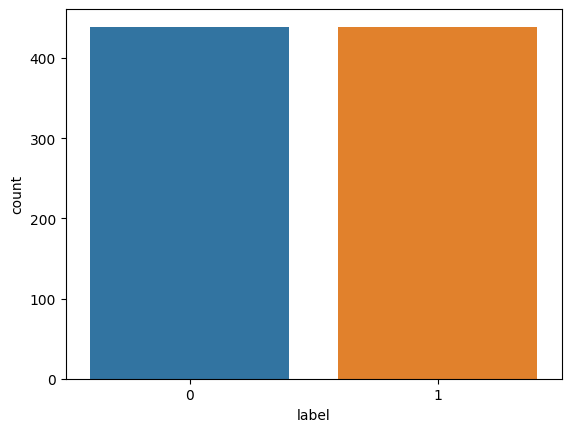

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

resampler = RandomUnderSampler(random_state=0)
x_train_undersampled, y_train_undersampled = resampler.fit_resample(x_train, y_train)

sns.countplot(x=y_train_undersampled)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train_undersampled, y_train_undersampled)

MultinomialNB()

MultinomialNB()

In [ ]:
y_pred = model.predict(x_test)

from sklearn import metrics
acc=metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm,'\n\n')
print('------------------------------------------------------------')
result = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n")
print(result)

accuracy:0.94


Confusion Matrix:
[[121   3]
 [ 11 115]] 


------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       124
           1       0.97      0.91      0.94       126

    accuracy                           0.94       250
   macro avg       0.95      0.94      0.94       250
weighted avg       0.95      0.94      0.94       250



In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

print(sentiment.polarity_scores('This move is great!'))
print(sentiment.polarity_scores('This move is not great.'))

{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}
{'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'compound': -0.5096}


In [ ]:
reviews = pd.read_csv('BA_AirlineReviews.csv')
reviews.head()

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


In [ ]:
reviews.describe()

,Unnamed: 0,OverallRating,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Food&Beverages,InflightEntertainment,Wifi&Connectivity
count,3701.000000,3696.000000,3585.000000,3574.000000,2855.000000,3700.000000,3315.000000,2551.000000,609.000000
mean,1850.000000,4.734307,2.875314,3.254057,2.784238,2.688378,2.713122,2.646021,1.924466
std,1068.531001,3.175306,1.362081,1.489709,1.457058,1.471887,1.437092,1.398509,1.352705
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,925.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1850.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
75%,2775.000000,8.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000
max,3700.000000,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:

reviews['compound'] = [sentiment.polarity_scores(review)['compound'] for review in reviews['ReviewBody']]
reviews['neg'] = [sentiment.polarity_scores(review)['neg'] for review in reviews['ReviewBody']]
reviews['neu'] = [sentiment.polarity_scores(review)['neu'] for review in reviews['ReviewBody']]
reviews['pos'] = [sentiment.polarity_scores(review)['pos'] for review in reviews['ReviewBody']]


In [ ]:
reviews[['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,3701.000000,3701.000000,3701.000000,3701.000000
mean,0.168347,0.078372,0.808143,0.113491
std,0.776621,0.053919,0.073970,0.082585
min,-0.997400,0.000000,0.436000,0.000000
25%,-0.723500,0.040000,0.764000,0.053000
50%,0.482500,0.072000,0.815000,0.093000
75%,0.928600,0.109000,0.861000,0.158000
max,0.999200,0.348000,1.000000,0.498000


<Axes: xlabel='compound', ylabel='Count'>

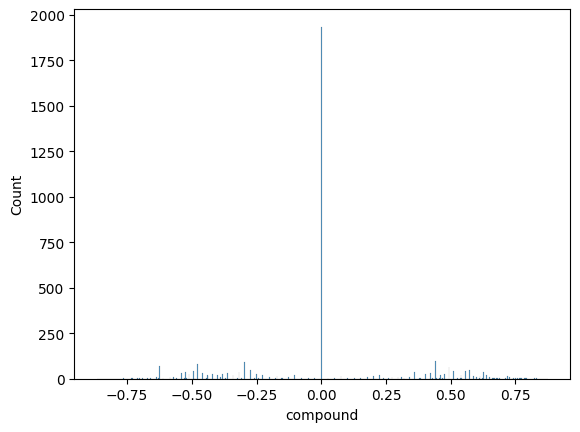

In [ ]:
sns.histplot(reviews['compound'])

<Axes: xlabel='neg', ylabel='Count'>

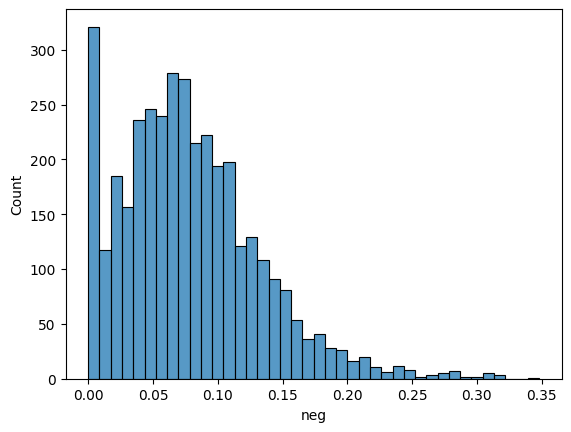

In [ ]:
sns.histplot(reviews['neg'])

In [ ]:
(reviews['compound']<=0).groupby(reviews['Name']).sum().sort_values(ascending=False)

Name
David Ellis    26
Clive Drake    26
J Tydeman      11
Bob Motto      11
E Smyth        11
               ..
M Christie      0
M Cowell        0
M Dale          0
M Davies        0
m Leeson        0
Name: compound, Length: 2906, dtype: int64

In [ ]:
percent_negative = pd.DataFrame((reviews['compound']<=0).groupby(reviews['Name']).sum()
                              /reviews['Name'].groupby(reviews['Name']).count()*100,
                                  columns=['% negative reviews']).sort_values(by='% negative reviews', ascending=False)

percent_negative

,% negative reviews
Name,
J Gaswana,100.0
L Gainsford,100.0
L Mcmahon,100.0
L Mendes,100.0
L Payson,100.0
...,...
M Christie,0.0
M Cowell,0.0
M Dale,0.0


In [ ]:
reviews['processed_review'] = reviews['ReviewHeader'].apply(preprocess_text)
reviews_positive_subset = reviews.loc[(reviews['ReviewHeader']) & (reviews['compound']>0),:]
reviews_negative_subset = reviews.loc[(reviews['ReviewHeader']) & (reviews['compound']<=0),:]
reviews_positive_subset.head()